In [3]:
import numpy as np
import math
from itertools import product

In [ ]:
#1

# Подбрасываются три игральных кубика. Оцените вероятность того, что сумма значений этих кубиков не будет превышать 6.
# Подсказка: оценкой вероятности может служить, например, относительная частота при большом числе опытов.
# Попробуйте реализовать наибольшее число опытов, которое позволяют ваш компьютер и/или ваше терпение.

# Ок, мы знаем, что число сочетаний для трех кубиков = 6**3 = 216
# Выведем "тройки" для наглядности

In [6]:
triples = list(product(range(1,7), repeat=3))
triples[:10]

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4)]

In [8]:
# Становится ясно, для выполнения условий суммы не больше 6 необходимо исключить все сочетания, содержащие в себе 5 и 6
new_triples = list(product(range(1, 5), repeat=3))
new_triples[:10]

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 1),
 (1, 3, 2)]

In [ ]:
# Если опираться не первую пару чисел 1-1, то нам подходят дальше все 4 цифры (1,2,3,4)
# Если опираться не первую пару чисел 1-2, то нам подходят дальше только 3 цифры (1,2,3)
# Если опираться не первую пару чисел 1-3, то нам подходят дальше только 2 цифры (1,2)
# И если опираться не первую пару чисел 1-4, то нам подходит дальше только цифра 1
# То есть, если первая выпавшая цифры будет 1, всего нам подходит 10 комбинаций
# Это же работает для первых выпвших 2,3,4, что говорит об общим количестве удовлетворяющих комбинация = 40

In [11]:
# Итог, нам подходит 40 из 216 комбинаций. Посчитаем относительную частоту W(A), где А будет событием с суммой <=6
n = 216
m = 40
W = m/n
W

0.18518518518518517

In [39]:
# Только теперь до меня дошло, как можно сделать короче
# Итак, чтобы найти сумму не больше 6, нужно понять все сочетаний сумм на 3-х костях

sum_list = []

for n in triples:
    sum_list.append((sum(n)))

list(set(sum_list))

# Всего их 16:

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [40]:
# С помощью примера из занятия, задаем функцию, а дальше указываем кол-во испытаний

def dice_frequency(n: int) -> float:
    """Относительная частота выпадения значения <=6 при броске трех кубиков.
    
    :param n: число испытаний
    """

    b = np.random.randint(3, 19, size=n)
    
    m = (b < 7).sum()
    
    return m / n

In [41]:
from matplotlib import pyplot as plt
from tqdm.notebook import trange

plt.style.use('seaborn-whitegrid')

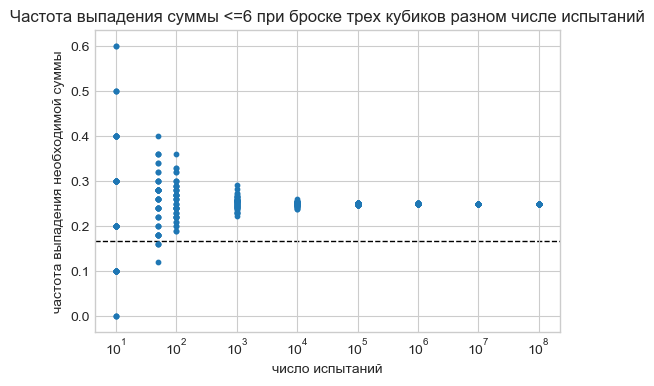

In [64]:
ns = [10, 50, 100, 1000, 10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7, 10 ** 8]

x = []
y = []

for _ in trange(50):
    for n in ns:
        x.append(n)
        y.append(dice_frequency(n))

plt.figure(dpi=100)

plt.scatter(x, y, s=10)
    
plt.axhline(y=1 / 6, c='black', ls='dashed', lw=1).set_zorder(0)
    
plt.xscale('log')

plt.title('Частота выпадения суммы <=6 при броске трех кубиков разном числе испытаний')
plt.xlabel('число испытаний')
plt.ylabel('частота выпадения необходимой суммы')

plt.show()

In [ ]:
#2

# Имеется колода в 52 карты.
# Найти число возможностей вытянуть из неё 4 карты так, чтобы среди них был хотя бы один туз.

# Пусть x1 - это события, при котором мы вытягиваем лишь 1 туз, x2 - 2 туза и тд

In [66]:
def combinations(n: int, k: int) -> int:
    """Число сочетаний.
    """
    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

In [68]:
x1 = combinations(4, 1) + combinations(48, 3)
x2 = combinations(4, 2) + combinations(48, 2)
x3 = combinations(4, 3) + combinations(48, 1)
x4 = combinations(52, 4)

In [69]:
# Число возможностей вытянуть как минимум 1 туз:

x1 + x2 + x3 + x4

289211

In [ ]:
# 3

# Из 60 вопросов, входящих в экзаменационные билеты, студент знает 50.
# Какова вероятность того, что среди трёх наугад выбранных вопросов студент знает: а) все? б) два?


In [74]:
# Общее кол-во сочетание для случая вытянуть 3 билета из 60
combinations(60, 3)

34220

In [75]:
# Кол-во решение для условия
combinations(50, 3)

19600

In [76]:
# Тогда вероятность для условия а)
combinations(50, 3)/combinations(60, 3)

0.5727644652250146

In [81]:
# Тогда для того, чтобы вытащить 1 неизвестный билет и 2 известных:
(combinations(50, 2) * combinations(10, 1))/combinations(60, 3)

0.35797779076563413

In [ ]:
# 4

# Бросается игральная кость.
# Пусть событие A - появление чётного числа,
# событие B - появление числа больше трёх.
# Являются ли эти события независимыми?

# Ответ: да, они независимые. Можно провести 100 испытаний, и задать условия, исходя из задачи.
# Для четного числа беру 2 (все равно, 2 или 4 или 6); для четных возьму 4

In [91]:
n = 100
a = np.random.randint(1,7, size=n)
b = np.random.randint(1,7, size=n)
c = a[ (a==2) & (b==4)]
m = len(c)
m

2

In [92]:
W = m/n
W

0.02

In [ ]:
# 5 
# Допустим, имеется некоторая очень редкая болезнь (поражает 0.1% населения).
# Вы приходите к врачу, вам делают тест на эту болезнь, и тест оказывается положительным.
# Врач говорит вам, что этот тест верно выявляет 99% больных этой болезнью и всего лишь в 1% случаев даёт ложный положительный ответ.
# Вопрос: какова вероятность, что вы действительно больны ей?
# Подсказка: используйте формулу Байеса с раскрытием знаменателя с помощью формулы полной вероятности.

# P(A|B) = 0.99 - вероятность, что я болен при + тесте
# P(a|B) = 0.01 - вероятность, что я здоров при + тесте
# P(b) = 0.001 - вероятность, что я поражен болезнью
# P(a) = 0.999 - вероятность, что я не поражен болезнью


In [93]:
# Полная вероятность того, что я болен P(A):
sick = 0.999*0.01 + 0.001*0.99
sick

0.01098

In [95]:
# По Байесу:
0.001*0.99/sick

0.09016393442622951